In [4]:
!pip install pgmpy
!pip install networkx
!pip install matplotlib

In [7]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Definiamo la struttura della rete
model = BayesianNetwork([('pioggia', 'manutenzione'), 
                         ('pioggia', 'treno'), 
                         ('manutenzione', 'treno'), 
                         ('treno', 'appuntamento')])

# Definiamo le CPD (Conditional Probability Distribution) per ogni nodo

# CPD per il nodo pioggia
cpd_pioggia = TabularCPD(variable='pioggia', variable_card=3, 
                         values=[[0.7], [0.2], [0.1]],
                         state_names={'pioggia': ['no', 'lieve', 'intensa']})

# CPD per il nodo manutenzione
cpd_manutenzione = TabularCPD(variable='manutenzione', variable_card=2, 
                              values=[[0.4, 0.2, 0.1],
                                      [0.6, 0.8, 0.9]],
                              evidence=['pioggia'], evidence_card=[3],
                              state_names={'manutenzione': ['si', 'no'],
                                           'pioggia': ['no', 'lieve', 'intensa']})

# CPD per il nodo treno
cpd_treno = TabularCPD(variable='treno', variable_card=2,
                       values=[[0.8, 0.9, 0.6, 0.7, 0.4, 0.5],
                               [0.2, 0.1, 0.4, 0.3, 0.6, 0.5]],
                       evidence=['pioggia', 'manutenzione'], evidence_card=[3, 2],
                       state_names={'treno': ['puntuale', 'ritardo'],
                                    'pioggia': ['no', 'lieve', 'intensa'],
                                    'manutenzione': ['si', 'no']})

# CPD per il nodo appuntamento
cpd_appuntamento = TabularCPD(variable='appuntamento', variable_card=2,
                              values=[[0.9, 0.6],
                                      [0.1, 0.4]],
                              evidence=['treno'], evidence_card=[2],
                              state_names={'appuntamento': ['presente', 'assente'],
                                           'treno': ['puntuale', 'ritardo']})

# Aggiungiamo le CPD al modello
model.add_cpds(cpd_pioggia, cpd_manutenzione, cpd_treno, cpd_appuntamento)

# Verifichiamo che il modello sia valido
print("Il modello è corretto: ", model.check_model())

# Stampa del modello
for cpd in model.get_cpds():
    print("CPD di {variable}:".format(variable=cpd.variable))
    print(cpd)



Il modello è corretto:  True
CPD di pioggia:
+------------------+-----+
| pioggia(no)      | 0.7 |
+------------------+-----+
| pioggia(lieve)   | 0.2 |
+------------------+-----+
| pioggia(intensa) | 0.1 |
+------------------+-----+
CPD di manutenzione:
+------------------+-------------+----------------+------------------+
| pioggia          | pioggia(no) | pioggia(lieve) | pioggia(intensa) |
+------------------+-------------+----------------+------------------+
| manutenzione(si) | 0.4         | 0.2            | 0.1              |
+------------------+-------------+----------------+------------------+
| manutenzione(no) | 0.6         | 0.8            | 0.9              |
+------------------+-------------+----------------+------------------+
CPD di treno:
+-----------------+-----+------------------+
| pioggia         | ... | pioggia(intensa) |
+-----------------+-----+------------------+
| manutenzione    | ... | manutenzione(no) |
+-----------------+-----+------------------+
| treno(p

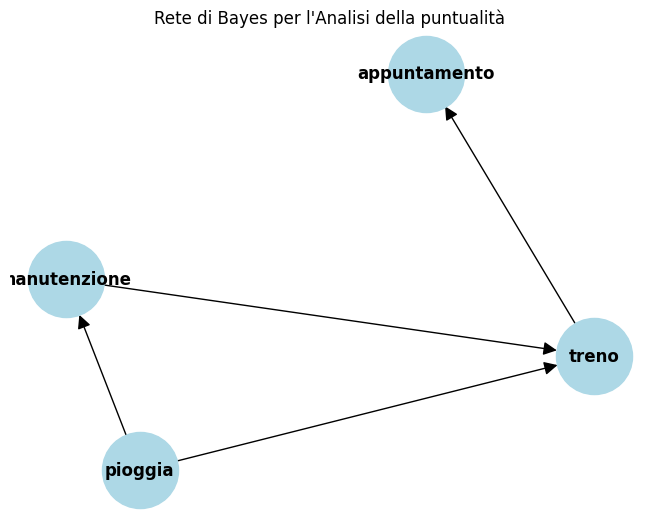

In [13]:

import networkx as nx
import matplotlib.pyplot as plt

# Assumendo che 'model' sia il tuo BayesianNetwork già definito
G = nx.DiGraph()
G.add_edges_from(model.edges())

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, arrowsize=20, font_size=12, font_weight='bold')

plt.title("Rete di Bayes per l'Analisi della puntualità")
plt.axis('off')
plt.show()

In [25]:
from pgmpy.inference import VariableElimination

# Creiamo un oggetto per l'inferenza
inference = VariableElimination(model)

# Definiamo l'evidenza per la situazione descritta
evidence = {
    'pioggia': "intensa",  
    'manutenzione': "si"

}

# Calcoliamo la probabilità di colpevolezza dato l'evidenza
result = inference.query(['appuntamento'], evidence=evidence)

# Stampiamo il risultato
print("Probabilità di arrivare puntuali all'appuntamento:")
print(result.values)

Probabilità di arrivare puntuali all'appuntamento:
[0.72 0.28]
